# Tests of the binary module

## Jeff J. Andrews, Andreas Zezas, & Tassos Fragos

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import corner
import density_contour
import pickle
from astropy.coordinates import SkyCoord
from astropy import units as u

%matplotlib inline

sys.path.append('../binary')
import binary_evolve
import load_sse
sys.path.append('../stats')
import stats
sys.path.append('../SF_history')
import sf_history
sys.path.append('../pop_synth')
import pop_synth


/Library/Python/2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
load_sse.load_sse()

### Critical Mass Ratio

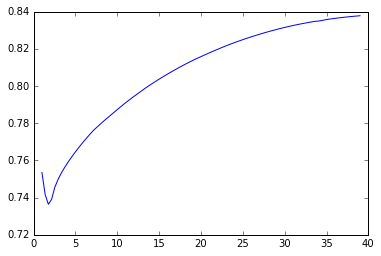

In [3]:
M1 = np.linspace(1.0, 39.0, 100)
M1_c = load_sse.func_sse_he_mass(M1)

x = 0.3
q_crit = (1.67 - x + 2*(M1_c/M1)**5) / 2.13
q_crit = 0.362 + 1.0 / (3.0*(1.0 - M1_c/M1))

#plt.plot(M1, M1_c)
plt.plot(M1, q_crit)
#plt.plot(M1, M1_c/M1)

#plt.ylim(0.0, 1.0)

plt.show()

### Stellar Profile Plots

In [4]:
import matplotlib.patches as mpatches


def plot_star_evolve(mass_in):
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

    ax1.set_title('Mass = ' + str(mass_in))
    
    # Set x values
    t_tmp = np.linspace(1.0, 100.0, 100000)

    # Get y values
    mass_tmp, mdot_tmp, radius_tmp, k_tmp = load_sse.func_get_sse_star(mass_in, t_tmp)

    # Get times for k-type change
    _, idx = np.unique(k_tmp, return_index=True)

    # Set patches, colors, etc
    patches = np.array([])
    colors=['k','k','g','r','b','c','y','m','k']


    
    
    # Plot stellar radii - linear
    ax1.plot(t_tmp, radius_tmp)
    for i in np.arange(len(t_tmp[np.sort(idx)])-2):

        t = t_tmp[np.sort(idx)][i+2]
        t_last = t_tmp[np.sort(idx)][i+1]
    
        # Get k-type
        k = int(k_tmp[np.sort(idx)][i+1])

        # Fill in with different colors
        ax1.fill_between(t_tmp, 0.0, radius_tmp, where=((t_tmp<t) & (t_tmp>t_last)), facecolor=colors[k], interpolate=True, alpha=0.5)

        # Hatched regions designate stars with convective envelopes
        if (k==3) or (k==5) or (k==6) or (k==8) or (k==9):
            ax1.fill_between(t_tmp, 0.0, radius_tmp, where=((t_tmp<t) & (t_tmp>t_last)), color="none", hatch='//', edgecolor='k', interpolate=True)
    
        k_str = str(k)

        
        patches = np.append(patches, mpatches.Patch(color=colors[k], label=k_str))

        
        
        
        
        
    # Plot stellar radii - log scale
    ax2.plot(t_tmp, radius_tmp)
    for i in np.arange(len(t_tmp[np.sort(idx)])-2):

        t = t_tmp[np.sort(idx)][i+2]
        t_last = t_tmp[np.sort(idx)][i+1]

        # Get k-type
        k = int(k_tmp[np.sort(idx)][i+1])

        # Fill in with different colors
        ax2.fill_between(t_tmp, 0.0, radius_tmp, where=((t_tmp<t) & (t_tmp>t_last)), facecolor=colors[k], interpolate=True, alpha=0.5)

        # Hatched regions designate stars with convective envelopes
        if (k==3) or (k==5) or (k==6) or (k==8) or k==9:
            ax2.fill_between(t_tmp, 0.0, radius_tmp, where=((t_tmp<t) & (t_tmp>t_last)), color="none", hatch='//', edgecolor='k', interpolate=True)
    
        k_str = str(k)
    
#        patches = np.append(patches, mpatches.Patch(color=colors[i], label=k_str))


    
    
    # Plot He-core mass
    ax3.plot(t_tmp, )



    # Create lower panel legend
    ax1.legend(title='k-type', handles=patches.tolist(), loc=2)

    # Set labels, limits
    delta_x = t_tmp[idx][-1] - t_tmp[idx][1]
    xlim = [- 0.15*delta_x + t_tmp[idx][1], 0.05*delta_x + t_tmp[idx][-1]]
    ax1.set_xlim(xlim)
    ax2.set_xlim(xlim)
    ylim = [1.0, 2.0*max(radius_tmp)]
    ax2.set_ylim(ylim)

    ax1.set_ylabel('k-type')
    ax2.set_ylabel('Radius (Rsun)')
    ax2.set_xlabel('Time (Myr)')
    ax2.set_yscale('log')

    return plt
    


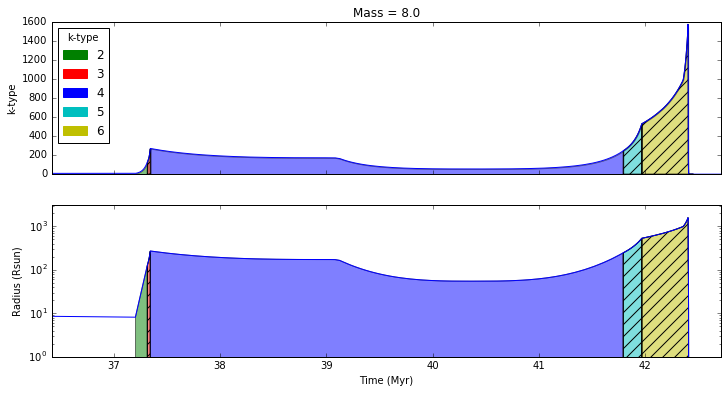

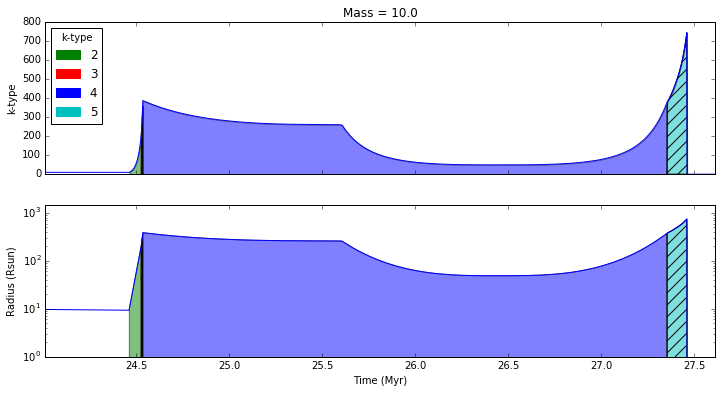

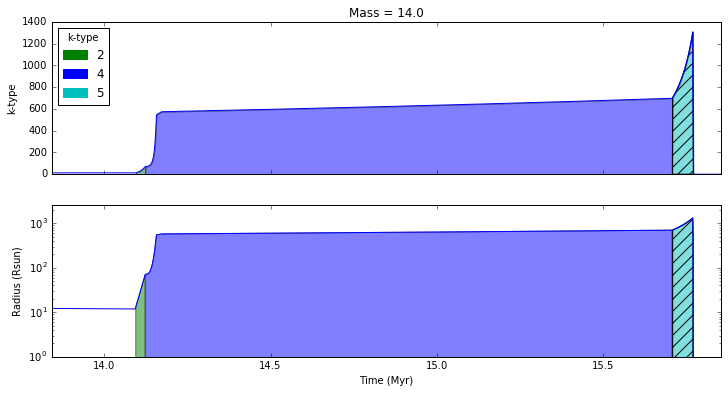

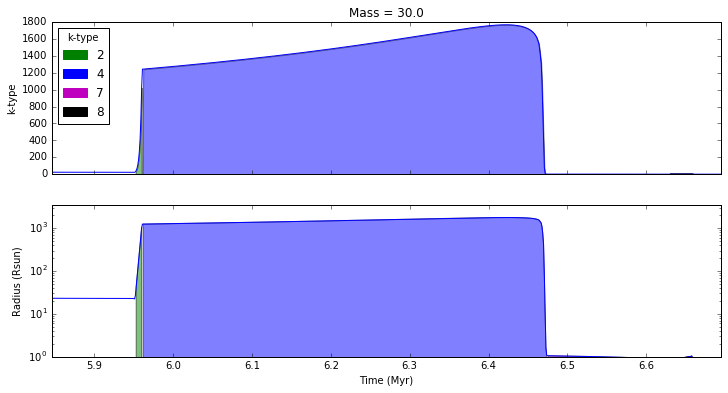

In [5]:
plot_star_evolve(8.0)
#plt.savefig('../figures/stellar_type_evolve_M8.pdf')

plot_star_evolve(10.0)
#plt.savefig('../figures/stellar_type_evolve_M10.pdf')

plot_star_evolve(14.0)
#plt.savefig('../figures/stellar_type_evolve_M14.pdf')

plot_star_evolve(30.0)
#plt.savefig('../figures/stellar_type_evolve_M30.pdf')

plt.show()

In [3]:
def plot_k_r(mass_in):

    
    # Set x values
    t_tmp = np.linspace(1.0, 100.0, 100000)

    # Get y values
    mass_tmp, mdot_tmp, radius_tmp, k_tmp = load_sse.func_get_sse_star(mass_in, t_tmp)

    # Get times for k-type change
    _, idx = np.unique(k_tmp, return_index=True)

    # Set patches, colors, etc
    patches = np.array([])
    colors=['k','k','g','r','b','c','y','m','k']

    
    tmp_r = np.linspace(1.0, 1800.0, 10000)
    tmp_k = load_sse.func_sse_get_k_from_r(mass_in, tmp_r)
    
    plt.plot(tmp_r, tmp_k)
    
    
#     # Plot k-types from time
#     plt.plot(t_tmp, k_tmp)
#     plt.ylim(0.0, 15.0)
#     for i in np.arange(len(t_tmp[np.sort(idx)])-1):
#         t = t_tmp[np.sort(idx)][i+1]
#         plt.axvline(t, color='k', linestyle='--')
        
        
    plt.show()


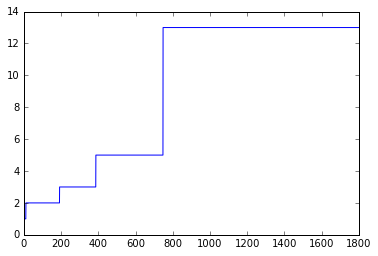

In [4]:
plot_k_r(10.0)

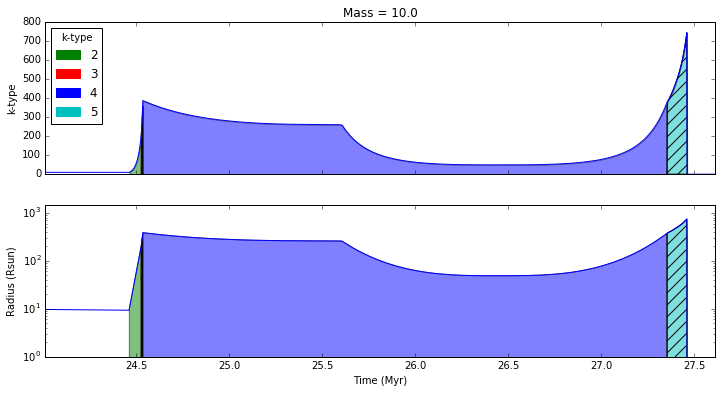

In [8]:
plot_star_evolve(10.0)

plt.show()

### SMC Star formation history

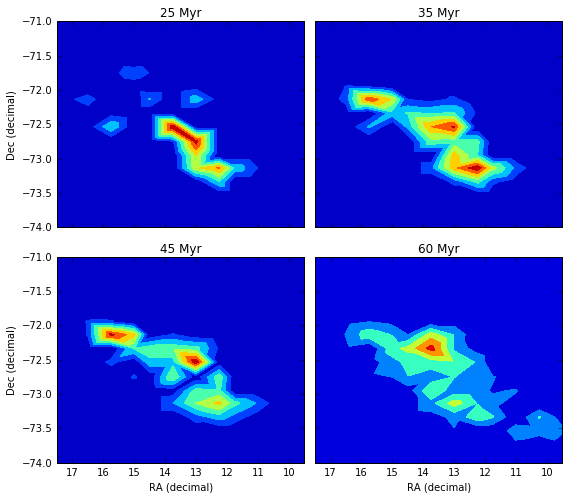

In [3]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,7))

a1 = sf_history.get_SMC_plot(25.0, ax1)
a2 = sf_history.get_SMC_plot(35.0, ax2)
a3 = sf_history.get_SMC_plot(45.0, ax3)
a4 = sf_history.get_SMC_plot(60.0, ax4)


xmin, xmax = 17.5, 9.5
ymin, ymax = -74.0, -71.0
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax3.set_xlim(xmin, xmax)
ax3.set_ylim(ymin, ymax)
ax4.set_xlim(xmin, xmax)
ax4.set_ylim(ymin, ymax)

ax1.set_ylabel("Dec (decimal)")
ax3.set_xlabel("RA (decimal)")
ax3.set_ylabel("Dec (decimal)")
ax4.set_xlabel("RA (decimal)")


plt.tight_layout()

#plt.show()
plt.savefig('../figures/SMC_SF_history.pdf')

### Initial Binary Parameters

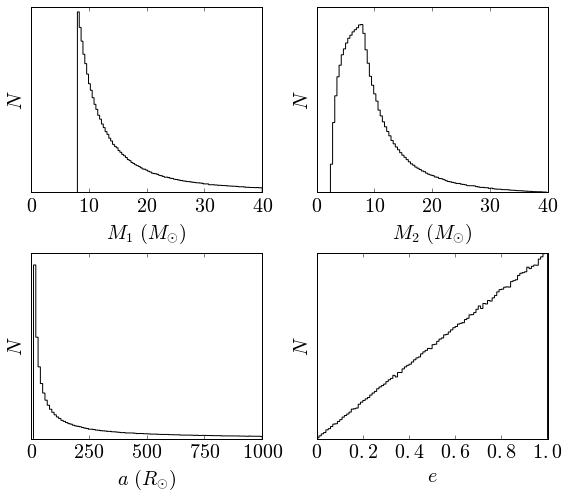

In [45]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,7))

N = 1000000


# M1
M1 = pop_synth.get_M1(8.0, 40.0, -2.35, N)
ax1.hist(M1, histtype='step', color='k', bins=100)
ax1.set_xlabel(r'$M_1\ (M_{\odot})$', fontsize=20)
ax1.set_ylabel(r'$N$', fontsize=20)
ax1.set_xticks([0.0, 10.0, 20.0, 30.0, 40.0])
ax1.set_xticklabels(['$0$', '$10$', '$20$', '$30$', '$40$'], fontsize=20)
ax1.set_yticks([])

# M2
q = pop_synth.get_q(N)
M2 = M1 * q
ax2.hist(M2, histtype='step', color='k', bins=100)
ax2.set_xlabel(r'$M_2\ (M_{\odot})$', fontsize=20)
ax2.set_ylabel(r'$N$', fontsize=20)
ax2.set_xticks([0.0, 10.0, 20.0, 30.0, 40.0])
ax2.set_xticklabels(['$0$', '$10$', '$20$', '$30$', '$40$'], fontsize=20)
ax2.set_yticks([])

# A
A = pop_synth.get_A(10.0, 1000.0, N)
ax3.hist(A, histtype='step', color='k', bins=100)
ax3.set_xlabel(r'$a\ (R_{\odot})$', fontsize=20)
ax3.set_ylabel(r'$N$', fontsize=20)
ax3.set_xticks([0.0, 250.0, 500.0, 750.0, 1000.0])
ax3.set_xticklabels(['$0$', '$250$', '$500$', '$750$', '$1000$'], fontsize=20)
ax3.set_yticks([])

# ecc
ecc = pop_synth.get_ecc(N)
ax4.hist(ecc, histtype='step', color='k', bins=100)
ax4.set_xlabel(r'$e$', fontsize=20)
ax4.set_ylabel(r'$N$', fontsize=20)
ax4.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax4.set_xticklabels(['$0$', '$0.2$', '$0.4$', '$0.6$', '$0.8$', '$1.0$'], fontsize=20)
ax4.set_yticks([])

plt.tight_layout()


#plt.show()
plt.savefig('../figures/initial_binary_distribution.pdf')

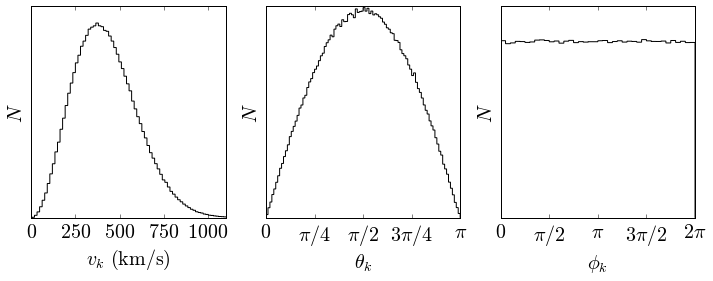

In [72]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))

N = 1000000


# v_k
v_k = pop_synth.get_v_k(265.0, N)
ax1.hist(v_k, histtype='step', color='k', bins=100)
ax1.set_xlim(0.0, 1100.0)
ax1.set_xlabel(r'$v_k\ ({\rm km/s})$', fontsize=20)
ax1.set_ylabel(r'$N$', fontsize=20)
ax1.set_xticks([0.0, 250.0, 500.0, 750.0, 1000.0])
ax1.set_xticklabels(['$0$', '$250$', '$500$', '$750$', '$1000$'], fontsize=20)
ax1.set_yticks([])


# theta
theta = pop_synth.get_theta(N)
ax2.hist(theta, histtype='step', color='k', bins=100)
ax2.set_xlim(0.0, np.pi)
ax2.set_xlabel(r'$\theta_k$', fontsize=20)
ax2.set_ylabel(r'$N$', fontsize=20)
ax2.set_xticks([0.0, np.pi/4.0, np.pi/2.0, np.pi*3.0/4.0, np.pi])
ax2.set_xticklabels(['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'], fontsize=20)
ax2.set_yticks([])


# phi
phi = pop_synth.get_phi(N)
ax3.hist(phi, histtype='step', color='k', bins=40)
ax3.set_xlim(0.0, 2.0*np.pi)
ax3.set_xlabel(r'$\phi_k$', fontsize=20)
ax3.set_ylabel(r'$N$', fontsize=20)
ax3.set_xticks([0.0, np.pi/2.0, np.pi, np.pi*3.0/2.0, 2.0*np.pi])
ax3.set_xticklabels(['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'], fontsize=20)
ax3.set_yticks([])



plt.tight_layout()

plt.savefig('../figures/kick_parameters.pdf')
#plt.show()